In [4]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# import pandas data reader to scrap the data from the yahoo finance website
import yfinance as yf
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
start = '2010-01-01'
end = '2022-12-31'

df = yf.download("AAPL", start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207779,77034200


In [8]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [9]:
df = df.drop(columns=['Date', 'Adj Close'])
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


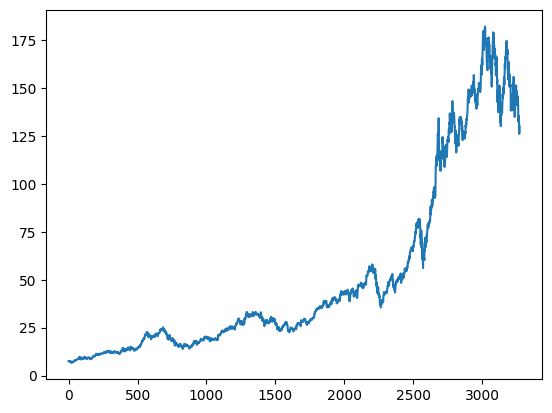

In [10]:
plt.plot(df.Close)

In [11]:
moving_avg_100 = df.Close.rolling(100).mean()
moving_avg_100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

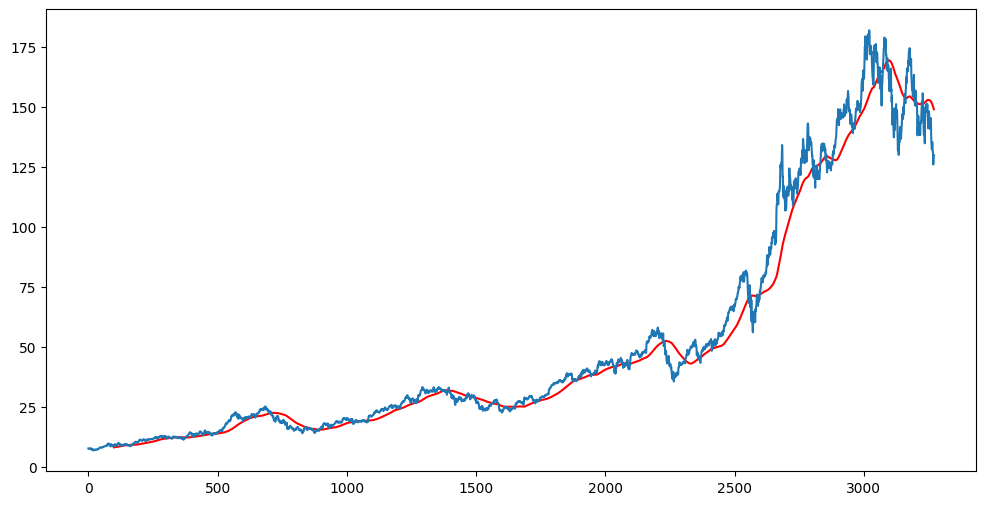

In [12]:
plt.figure(figsize = (12,6) )
plt.plot(moving_avg_100, 'r')
plt.plot(df.Close)
plt.show()

In [13]:
moving_avg_200 = df.Close.rolling(200).mean()
moving_avg_200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

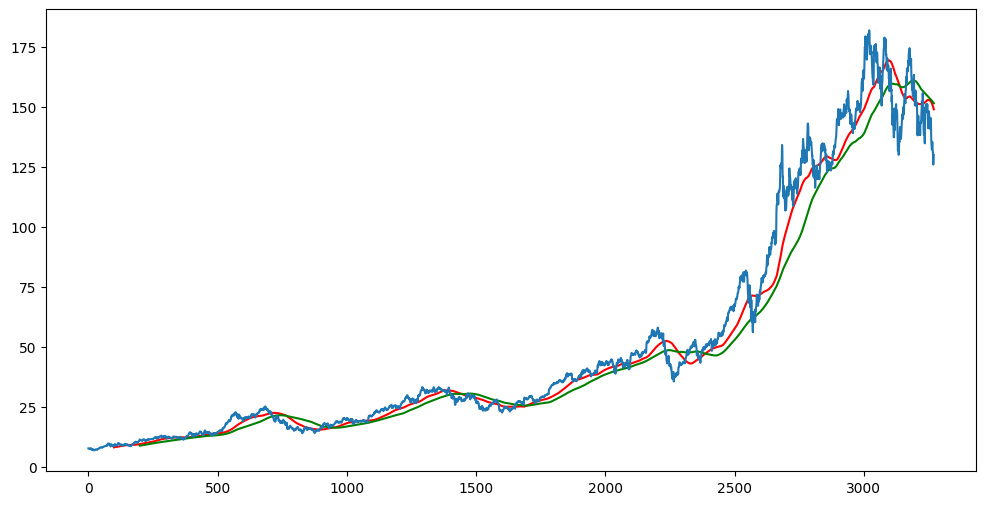

In [14]:
plt.figure(figsize = (12,6) )
plt.plot(moving_avg_100, 'r')
plt.plot(moving_avg_200, 'g')
plt.plot(df.Close)
plt.show()

In [15]:
df.shape
df.dropna(inplace=True)

In [16]:
data_train = pd.DataFrame(df.Close[0: int(len(df)*0.70)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.70): len(df)])

In [17]:
data_train.shape[0]
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
data_test.shape[0]
data_test.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_train_scale = scaler.fit_transform(data_train)

In [21]:
x_train = []
y_train = []

for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
# model:

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x_train,y_train, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
69/69 [==============================] - 8s 97ms/step - loss: 0.0346
Epoch 2/50
69/69 [==============================] - 7s 100ms/step - loss: 0.0068
Epoch 3/50
69/69 [==============================] - 7s 103ms/step - loss: 0.0056
Epoch 4/50
69/69 [==============================] - 7s 99ms/step - loss: 0.0059
Epoch 5/50
69/69 [==============================] - 7s 101ms/step - loss: 0.0048
Epoch 6/50
69/69 [==============================] - 7s 100ms/step - loss: 0.0044
Epoch 7/50
69/69 [==============================] - 7s 100ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 7s 100ms/step - loss: 0.0042
Epoch 9/50
69/69 [==============================] - 7s 101ms/step - loss: 0.0039
Epoch 10/50
69/69 [==============================] - 7s 100ms/step - loss: 0.0038
Epoch 11/50
69/69 [==============================] - 7s 100ms/step - loss: 0.0044
Epoch 12/50
69/69 [==============================] - 7s 101ms/step - loss: 0.0035
Epoch 13/50
69/69 [========

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [30]:
data_test_scale  =  scaler.fit_transform(data_test)

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [32]:
y_predict = model.predict(x)

31/31 [==============================] - 1s 26ms/step


In [33]:
scale =1/scaler.scale_

In [34]:
y_predict = y_predict*scale

In [35]:
y = y*scale


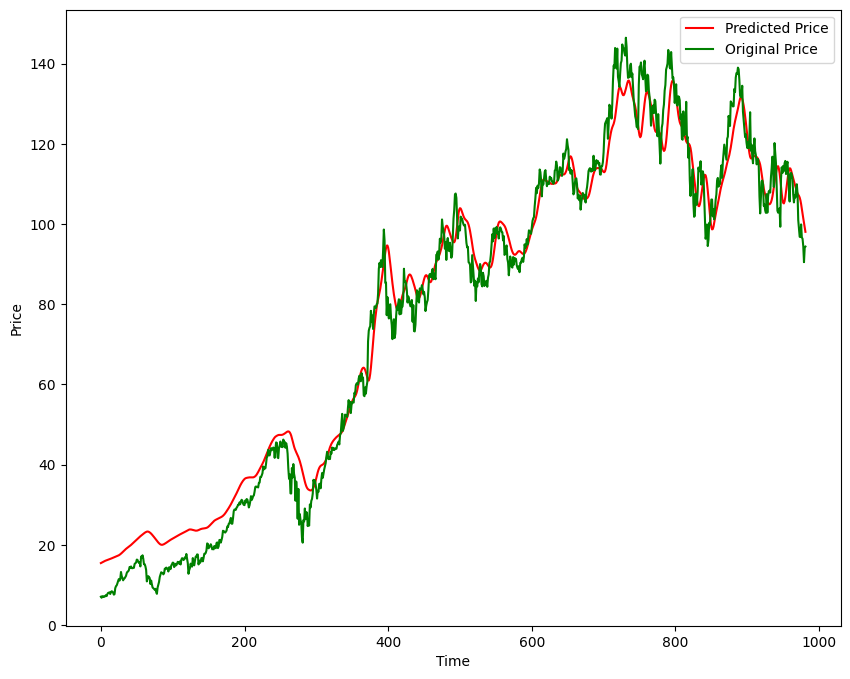

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
mse = mean_squared_error(y, y_predict)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y, y_predict)
print(f'R-squared: {r2}')

Mean Squared Error: 39.42819021512553
R-squared: 0.9778146240305637
